## Data In high dimensions
Random vectors in high dimension behave very differently from low dimensional vectors. 

Our intuition fails us.

For a better understanding, rely on the law of large numbers and central limit theorem.

In [1]:
from lib.Kmeans_generate_and_analyze import *
from numpy.random import randint


In [2]:
def gen_data(k=2,n=1000,d=2,radius=5):
    df,centers=create_data(k,n,d,radius=radius)
    #print(centers)
    M=np.array(df.iloc[:,:-1])
    return M

def my_hist(L,_title,one_side=True,_xlim=[-10,10]):
    hist(L,bins=50);
    title(_title)
    if one_side:
        xlim([0,max(L)*1.3])
    else:
        xlim(_xlim)
    
    grid()
    return None

### Vector Lengths become increasingly similar with dimension

Throughout this notebook, we consider data generated from two gaussian distributions. One at $x=-5$ and the other at $x=5$.

If the data is two dimensional, it behaves like we would expect - most vectors have length close to 5.

As the dimension increases, the length of the vectors becomes increasingly concentrated: most vectors have almost the same length.

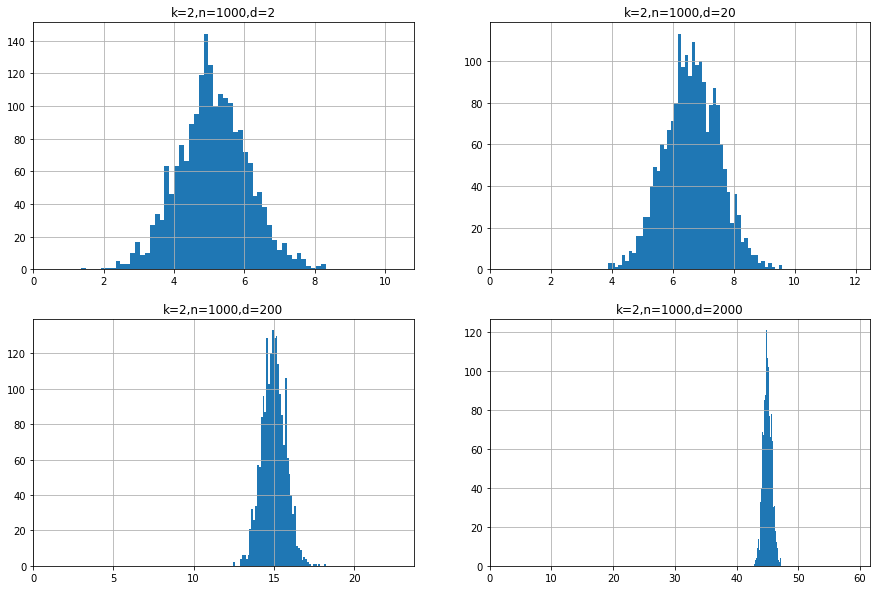

In [3]:
_d=[2,20,200,2000]
figure(figsize=[15,10])
for i in range(len(_d)):
    subplot(2,2,i+1);
    k=2;n=1000;d=_d[i]
    M=gen_data(k,n,d)
    L=np.sqrt(np.sum(M**2,axis=1))
    my_hist(L,_title='k=%d,n=%d,d=%d'%(k,n,d))

### Distance between two points

We have two spherical gaussians with std 1, centered at $x=-5$ and $x=5$.

When we have just two dimensions there is a clear distinction between small distances - where the two points are in the same cluster, and large distances, where they belong to different clusters.

As the dimension increases, the distance between two points becomes dominated by the $d-1$ dimensions where there is no separation.

At very high dimension, the distance between two points in the same cluster is indistinguishable from the distance between two points in different clusters.

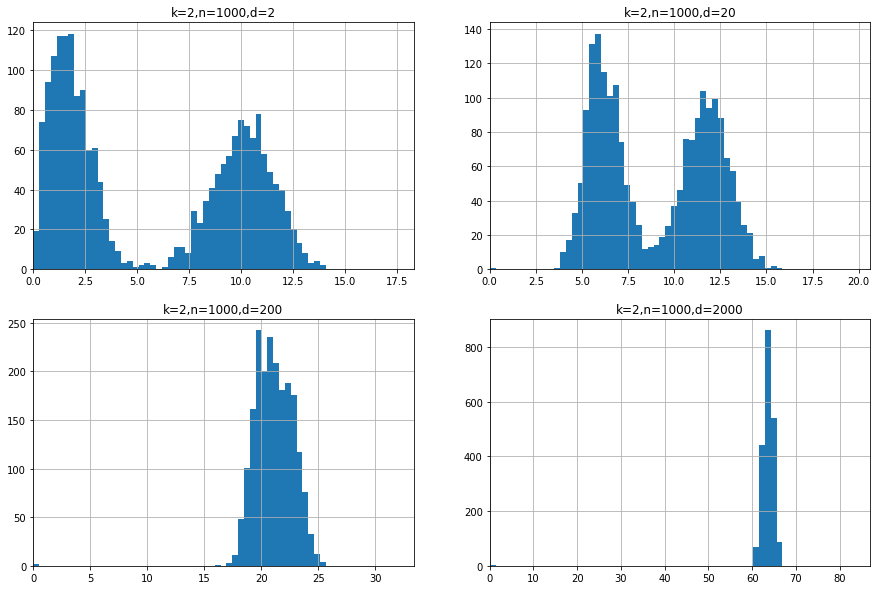

In [4]:
figure(figsize=[15,10])
for i in range(len(_d)):
    subplot(2,2,i+1);
    k=2;n=1000;d=_d[i]
    M=gen_data(k,n,d)
    l=M.shape[0]
    I=randint(l,size=[l,2])

    X0=M[I[:,0],:]
    X1=M[I[:,1],:]
    L=np.sqrt(np.sum((X0-X1)**2,axis=1))

    my_hist(L,_title='k=%d,n=%d,d=%d'%(k,n,d))

## Dot Products

When we take the dot product between two random vectors we expect that, because of the two clusters, the result would be concentrater around $5\times -5 = -25$ or $5\times 5=+25$.

That is true for dimension 2 and for dimension 20. But when we reach dimenson 200, the peaks have a large overlap, and when we reach 2000 they are indistinguishable.

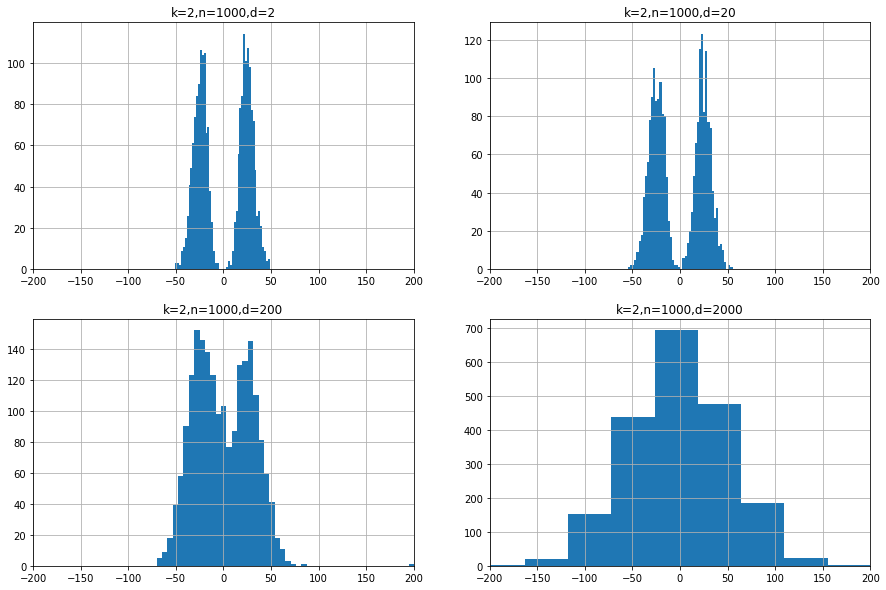

In [5]:
figure(figsize=[15,10])
for i in range(len(_d)):
    subplot(2,2,i+1);
    k=2;n=1000;d=_d[i]
    M=gen_data(k,n,d,radius=5)
    l=M.shape[0]
    I=randint(l,size=[l,2])

    X0=M[I[:,0],:]
    X1=M[I[:,1],:]
    L=np.sum(X0*X1,axis=1)

    my_hist(L,_title='k=%d,n=%d,d=%d'%(k,n,d),one_side=False,_xlim=[-200,200])


### Summary

* The 2d and 3D intuitions break down at high dimensions. The lengths of vectors, the distance between vectors and the dot products between vectors all become highly concentrated and therefor not informative.
* **The curse of dimensionality** : Most statistical methods break down at high dimensions.